In [283]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage
import skimage.filters as skif
print(skimage.__version__)

0.16.2


In [284]:
def DataToArray(path,filename,x0,x1,y0,y1):
    filepath=path+filename
    I=plt.imread(filepath)
    I=np.array(I,dtype=int)
    I=I[x0:x1,y0:y1]
    return I

In [292]:
path='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
x0=600
x1=1600
y0=500
y1=1600
signal='1A_0001.tif'
I=DataToArray(path,signal,x0,x1,y0,y1)
background='FONDO_EXP01_0001.tif'
If=DataToArray(path,background,x0,x1,y0,y1)
Isf=I-If

### Imagen

Text(0.5, 1.0, 'Sin fondo')

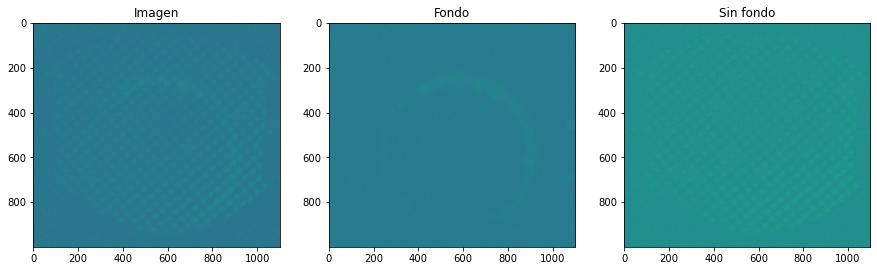

In [299]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(I)
ax[0].set_title('Imagen')
ax[1].imshow(If)
ax[1].set_title('Fondo')
ax[2].imshow(Isf)
ax[2].set_title('Sin fondo')

### Procesamiento de imagenes

aplicar diferentes thresholds a las imagenes. El threshold 'mean' es el que mejor resultado da asi que utilizaré este

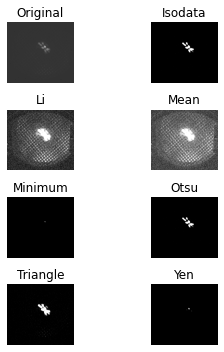

In [302]:
%matplotlib inline
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
signal='6A_0001.tif'
I=DataToArray(path1,signal,x0,x1,y0,y1)
path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
If=DataToArray(path2,background,x0,x1,y0,y1)
Isf=I-If
I_filtered=skif.try_all_threshold(Isf, figsize=(5, 5), verbose=False)
plt.show()
#plt.imshow(I_filtered,cmap='viridis')
#plt.colorbar()

Utilizando 'threshold_mean':

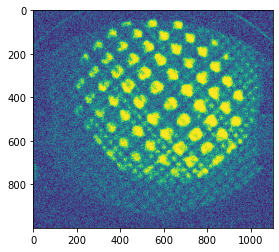

In [303]:
%matplotlib inline
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
signal='7A_0001.tif'
I=DataToArray(path1,signal,x0,x1,y0,y1)
path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
If=DataToArray(path2,background,x0,x1,y0,y1)
Isf=I-If
plt.figure()
thresh=skif.threshold_mean(Isf)
binary = Isf > thresh
plt.imshow(binary)

### FFT

Cada una de las especies se enfoca de forma distinta en el LEBT, por lo, cada una que crea un patron diferente en la pantalla de fosforo. Cada patrón va a tener una frecuencia caracteristica.

Se ha realizado un FFT para ver si se pueden resolver las frecuencias de cada una de las especies.

In [314]:
x0,y0=100,100
x1,y1=2000,2000
path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
signal='4A_0001.tif'
I=DataToArray(path1,signal,x0,x1,y0,y1)
path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
background='FONDO_EXP01_0001.tif'
If=DataToArray(path2,background,x0,x1,y0,y1)
Isf=I-If

Girar la imagen para alinear los puntos: giro de $\sim -40.5^\circ$

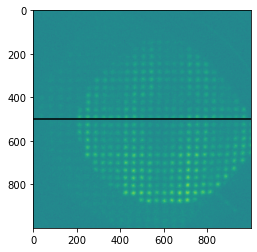

In [318]:
x0,x1=450,1450
y0,y1=450,1450
angle=-40.5
rot=skimage.transform.rotate(Isf,angle)
plt.hlines(500,0,1000)
rot=rot[x0:x1,y0:y1]
plt.imshow(rot)

FFT en 2 dimensiones:

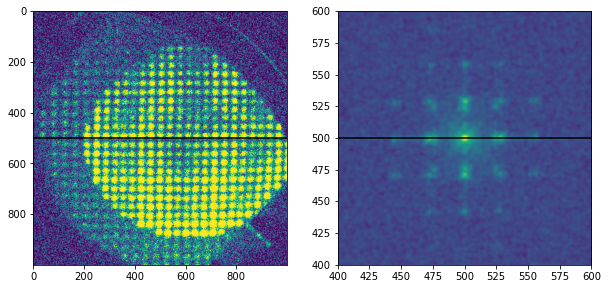

In [320]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hlines(500,0,1000)
ax[1].hlines(500,0,1000)
thresh=skif.threshold_mean(rot)
rot = rot > thresh
ft = np.fft.ifftshift(rot)
ax[0].imshow(rot)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
ft=skif.gaussian(abs(ft),1)
ax[1].set_ylim([-(x0-x1)/2-100, -(x0-x1)/2+100])
ax[1].set_xlim([-(y0-y1)/2-100, -(y0-y1)/2+100])
ax[1].imshow(np.log10(abs(ft)))

Para ver mejor el fft he calculado las proyecciones en x y en y de las imagenes y he calculado el FFT de cada una de ellas: 

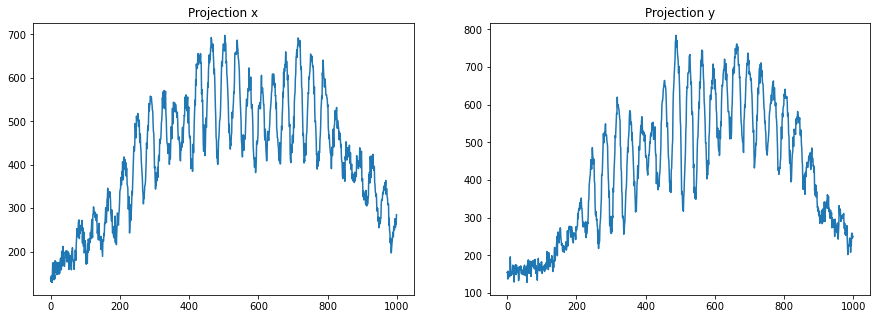

In [321]:
projx=np.sum(rot,0)
projy=np.sum(rot,1)
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].plot(projx)
ax[0].set_title('Projection x')
ax[1].set_title('Projection y')
ax[1].plot(projy)

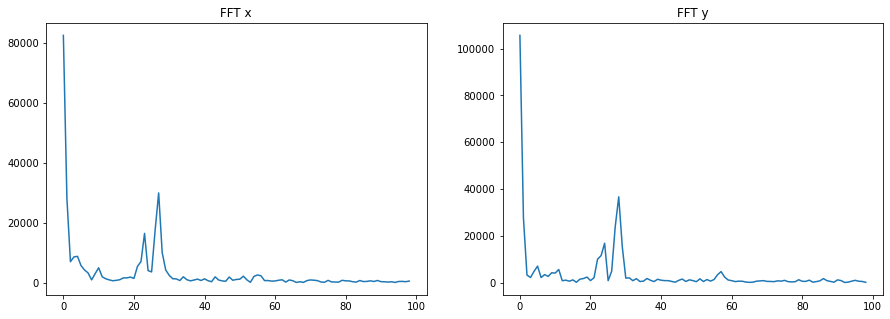

In [322]:
ftx=np.fft.fft(projx)
fty=np.fft.fft(projy)
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].plot(abs(ftx[1:int(ftx.size/10)]))
ax[0].set_title('FFT x')
ax[1].set_title('FFT y')
ax[1].plot(abs(fty[1:int(fty.size/10)]))

### FFT de cada imagen

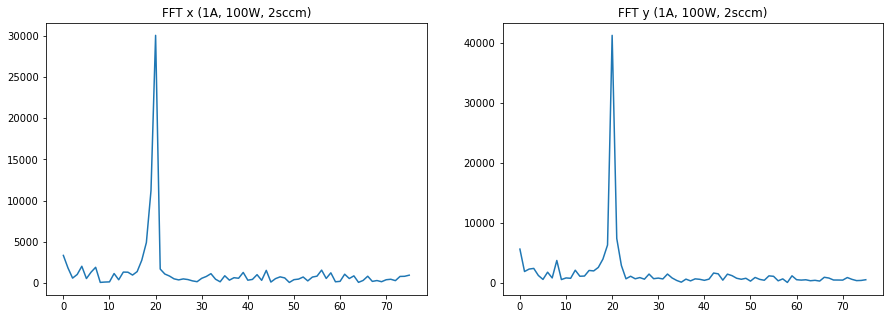

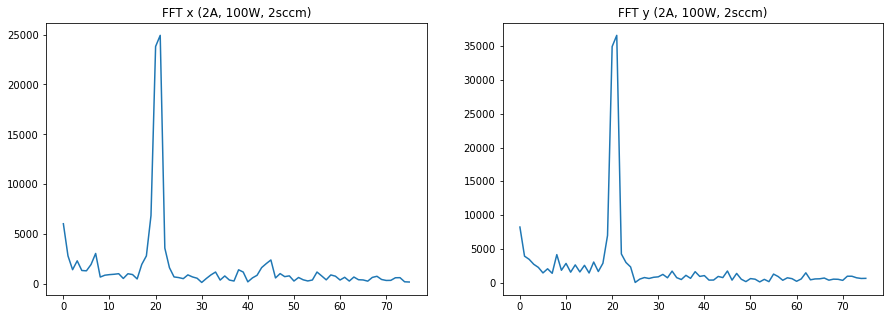

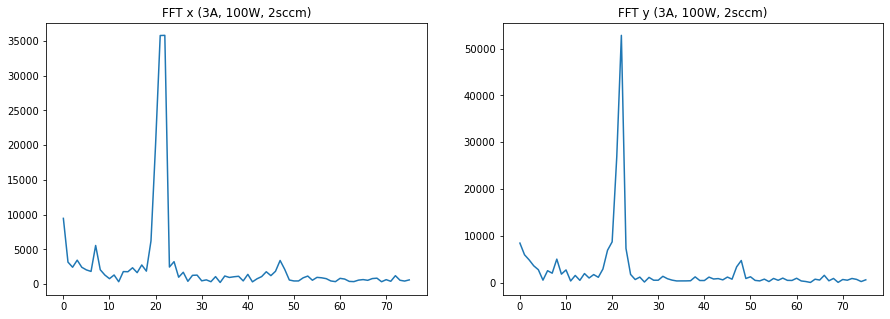

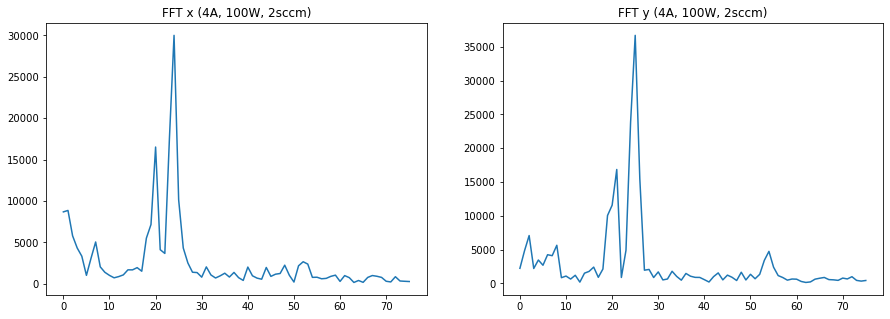

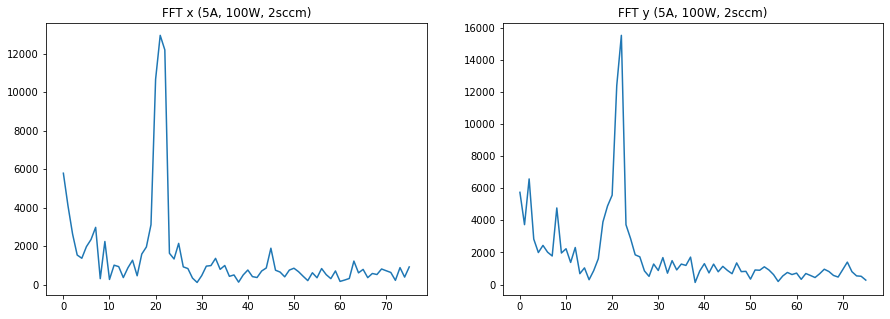

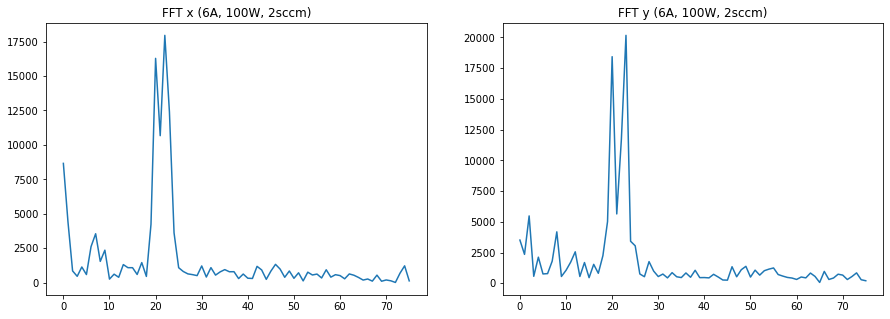

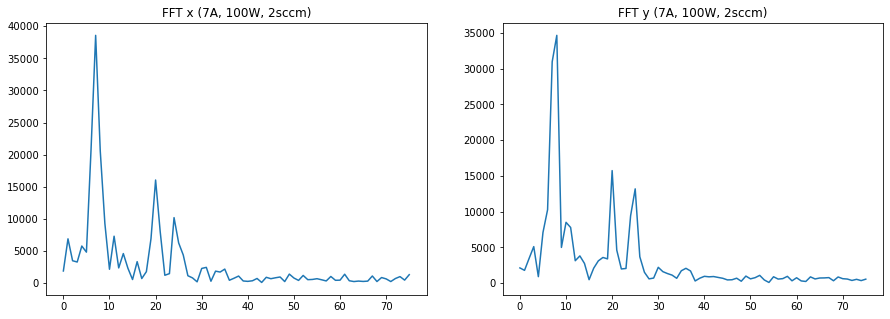

In [278]:
for i in range (1,8):
    x0,y0=100,100
    x1,y1=2000,2000
    path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
    signal='{}A_0001.tif'.format(i)
    I=DataToArray(path1,signal,x0,x1,y0,y1)
    path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/2gas_100W/'
    background='FONDO_EXP01_0001.tif'
    If=DataToArray(path2,background,x0,x1,y0,y1)
    Isf=I-If
    x0,x1=450,1450
    y0,y1=450,1450
    angle=-40.5
    rot=skimage.transform.rotate(Isf,angle)
    rot=rot[x0:x1,y0:y1]
    thresh=skif.threshold_mean(rot)
    rot = rot > thresh
    projx=np.sum(rot,0)
    projy=np.sum(rot,1)
    ftx=np.fft.fft(projx)
    fty=np.fft.fft(projy)
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(abs(ftx[4:int(80)]))
    ax[0].set_title('FFT x ({}A, 100W, 2sccm)'.format(i))
    ax[1].set_title('FFT y ({}A, 100W, 2sccm)'.format(i))
    ax[1].plot(abs(fty[4:int(80)]))

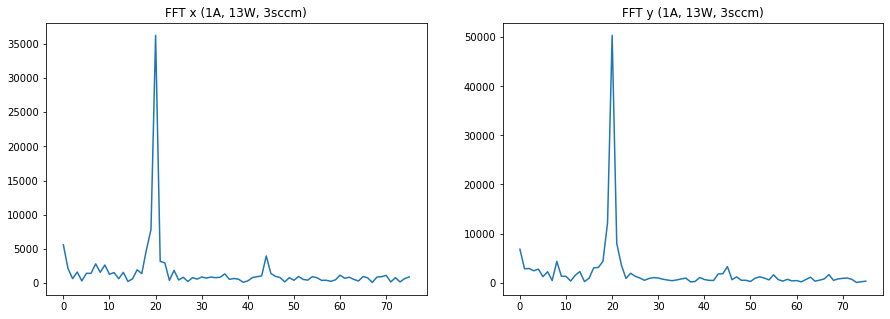

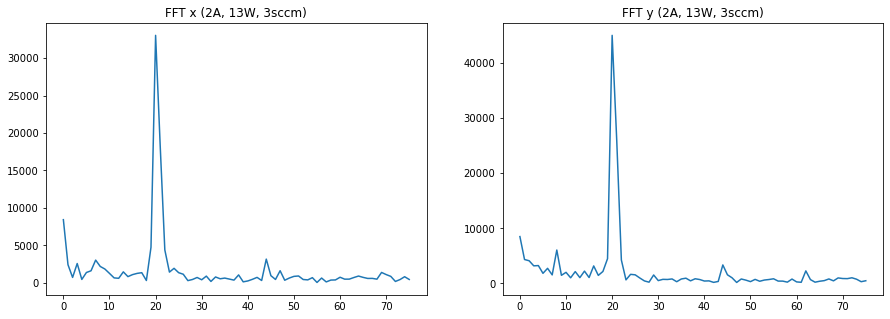

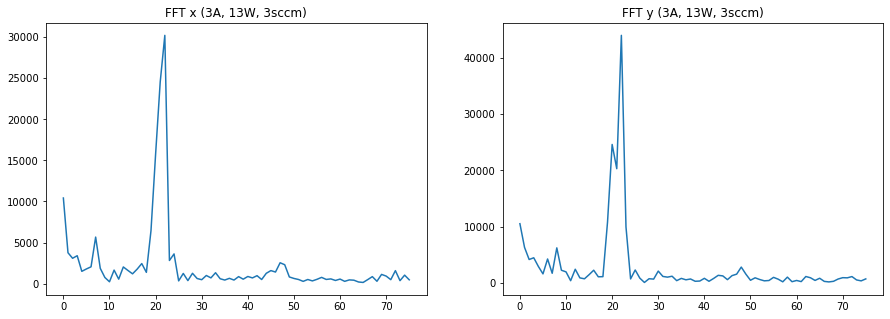

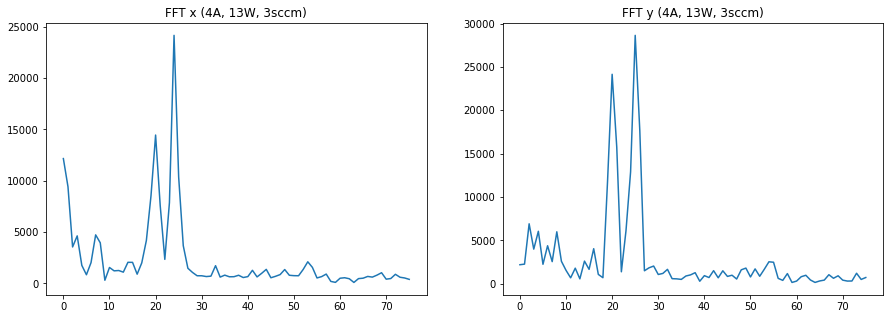

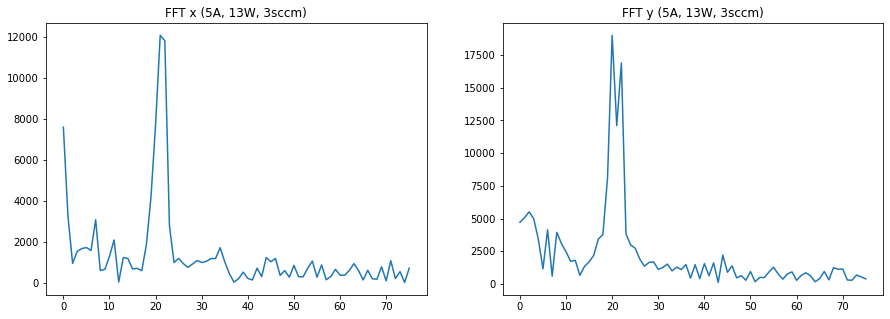

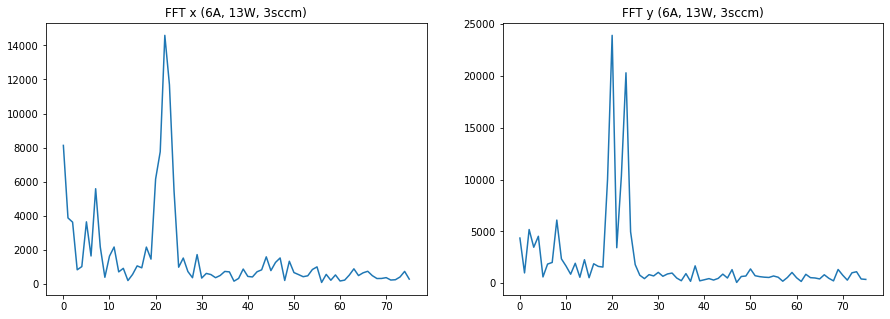

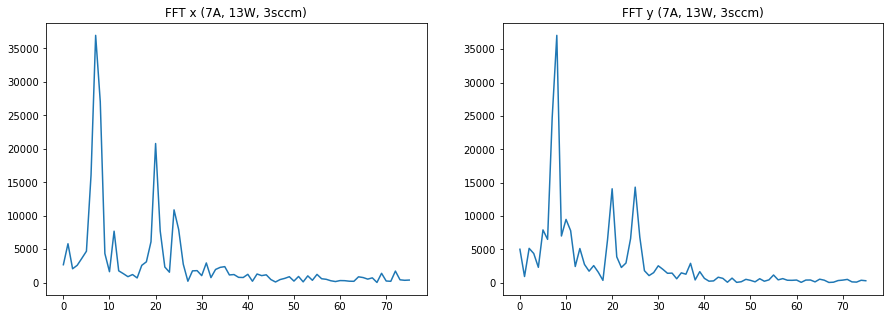

In [280]:
for i in range (1,8):
    x0,y0=100,100
    x1,y1=2000,2000
    path1='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/3GAS13W/'
    signal='{}A_0001.tif'.format(i)
    I=DataToArray(path1,signal,x0,x1,y0,y1)
    path2='C:/Users/mikel/Documents/LINAC7/Emittance/7jul22Pepper_copy/3GAS13W/'
    background='FONDO_0001.tif'
    If=DataToArray(path2,background,x0,x1,y0,y1)
    Isf=I-If
    x0,x1=450,1450
    y0,y1=450,1450
    angle=-40.5
    rot=skimage.transform.rotate(Isf,angle)
    rot=rot[x0:x1,y0:y1]
    thresh=skif.threshold_mean(rot)
    rot = rot > thresh
    projx=np.sum(rot,0)
    projy=np.sum(rot,1)
    ftx=np.fft.fft(projx)
    fty=np.fft.fft(projy)
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(abs(ftx[4:int(80)]))
    ax[0].set_title('FFT x ({}A, 13W, 3sccm)'.format(i))
    ax[1].set_title('FFT y ({}A, 13W, 3sccm)'.format(i))
    ax[1].plot(abs(fty[4:int(80)]))